In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [40]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [41]:
(X_train,y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [42]:
print("X_train Shape : {}".format(X_train.shape))
print()
print("X_test Shape : {}".format(X_test.shape))

X_train Shape : (50000, 32, 32, 3)

X_test Shape : (10000, 32, 32, 3)


In [43]:
X_train[0].shape

(32, 32, 3)

In [44]:
X_train[0][0].shape

(32, 3)

In [54]:
def plot_sample(index):
    plt.figure(figsize = (10,2))
    plt.imshow(X_train[index])
    plt.axis("off")
    plt.show()

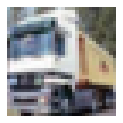

In [55]:
plot_sample(1)

In [56]:
classes = ["airplane", "automobile", "bird","cat", "deer", "dog", "frog","horse","ship","truck"]

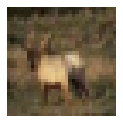

In [57]:
plot_sample(3)

In [58]:
classes[y_train[3][0]]

'deer'

# Preprocessing : Scale Images

In [59]:
# 0 ile 1 arasında sayılara dönüştürdük !!!

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
y_train_categorical = to_categorical(y_train,num_classes=10, dtype = "float32")
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_test_categorical = to_categorical(y_test,num_classes=10, dtype = "float32")
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# Model Building and Training

In [63]:
test = np.ones(shape = (5,5,3))
test

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [65]:
# Flatten işlemi 

test.reshape(5*5*3,)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [67]:
# Model kurmadan önce 
# Böyle olduğunda sparse_categorical_crossentropy
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [69]:
# Böyle olduğunda categorical_crossentropy
# Kısacası

y_test_categorical[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [70]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [73]:
model = Sequential()

model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(3000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))


# SGD : Stochastic Gradient Descent Veri Çok Ondan Bunu Seçtik

model.compile(optimizer = "SGD", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_scaled, y_train_categorical ,epochs = 1, validation_data = (X_test_scaled, y_test_categorical))

1563/1563 [==============================] - 99s 63ms/step - loss: 1.8177 - accuracy: 0.3512 - val_loss: 1.7389 - val_accuracy: 0.3884


In [77]:
from sklearn.metrics import confusion_matrix

In [82]:
y_pred = model.predict(X_test_scaled)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[5, 9, 9, 0, 4]

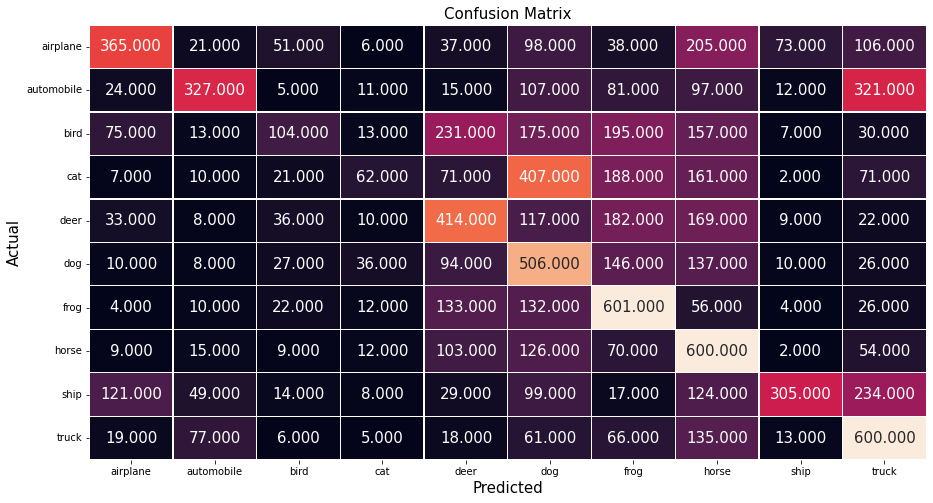

In [88]:
import seaborn as sns

plt.figure(figsize = (15,8))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True, annot_kws = {"size" : 15}, cbar = False, linewidths=0.3, fmt = ".3f", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix",fontsize = 15)
plt.xlabel("Predicted", fontsize = 15)
plt.ylabel("Actual", fontsize = 15)
plt.show()

# Let's make some predictions

In [94]:
# Argmax() kullanacağız 

model.predict(X_test_scaled)[:5]


array([[0.28639567, 0.49914885, 0.6399678 , 0.8008425 , 0.45831868,
        0.84655595, 0.80020106, 0.24202359, 0.3598049 , 0.16408679],
       [0.68667144, 0.867988  , 0.17371899, 0.26365918, 0.27161473,
        0.22192252, 0.08238801, 0.2904082 , 0.8318237 , 0.9511951 ],
       [0.79859614, 0.76326215, 0.2994308 , 0.31649536, 0.25162303,
        0.33019465, 0.03717461, 0.48838988, 0.85273075, 0.8729027 ],
       [0.799489  , 0.4665073 , 0.6062126 , 0.30407536, 0.48710856,
        0.45220685, 0.10329929, 0.6606548 , 0.7331427 , 0.43506622],
       [0.20744976, 0.12153149, 0.7561032 , 0.49003616, 0.9106467 ,
        0.6720185 , 0.82064027, 0.6722752 , 0.13512114, 0.11341536]],
      dtype=float32)

In [96]:
# Tahmini Değer !
np.argmax(model.predict(X_test_scaled)[0])

5

In [97]:
# Gerçek Değer !
y_test[0]

array([3], dtype=uint8)

In [98]:
def get_model():

    model = Sequential()

    model.add(Flatten(input_shape = (32,32,3)))
    model.add(Dense(3000, activation = "relu"))
    model.add(Dense(1000, activation = "relu"))
    model.add(Dense(10 , activation = "sigmoid"))

    model.compile(optimizer = "SGD", loss = "binary_crossentropy", metrics = ["accuracy"])

    return model

# Measure Training Time On A CPU on DGX station

In [102]:
%%timeit -n1 -r1

with tf.device("/CPU:0"):

    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 89s 57ms/step - loss: 0.3037 - accuracy: 0.2920
1 loop, best of 1: 1min 29s per loop


In [103]:
# Ekran kartınız harici ise daha hızlı sonuçlar alırsınız !!!!
# Bende olmadığı için sonuç aynı çıktı !!!

%%timeit -n1 -r1

with tf.device("/GPU:0"):

    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 89s 57ms/step - loss: 0.3042 - accuracy: 0.2922
1 loop, best of 1: 1min 30s per loop
